In [207]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sb
import uproot
from functools import reduce

            JetPt    JetEta    JetPhi  IsLLP           Lx           Ly  \
entry                                                                    
0       50.151355  1.767030  0.074290   True  1851.684326   178.223892   
1       45.315016  1.088594  0.364831  False     0.000000     0.000000   
2      163.244844  1.709549  2.769850   True   609.158691   239.010056   
3      147.121187 -0.237002 -0.393413  False     0.000000     0.000000   
4       54.661199 -0.730161 -2.550338  False     0.000000     0.000000   
...           ...       ...       ...    ...          ...          ...   
22571   76.296273  1.114254 -1.709045   True   259.214996  2172.912354   
22572   53.958059  0.729737  2.172977   True   499.816559   714.238342   
22573   44.355902 -1.914020 -1.443047  False     0.000000     0.000000   
22574   55.199289 -1.183146 -2.402029   True  2205.466064  1874.168701   
22575   45.983867 -2.013459  0.338020  False     0.000000     0.000000   

                Lz  
entry           

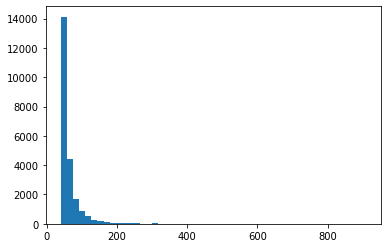

In [393]:
df_1 = uproot.open('df_1.root')[b'pandas_tree218;1']
a = df_1.pandas.df(['JetPt', 'JetEta', 'JetPhi', 'IsLLP', 'L[xyz]'])
print(a)
# We can see we have a dataframe that has 22575 entries of simulated values for various quantities.
# One feature to notice is that, for any row in which IsLLP is false, the decay length in every dimension is zero.
# This makes sense because, for a jet that isn't a LLP, there is no LLP decay length to measure.

JetPt_a = plt.hist(a.loc[:, 'JetPt'], bins = 50)
# JetPt is the magnitude of the jet momentum in the transverse plane (plane orthogonal to direction of proton beam)

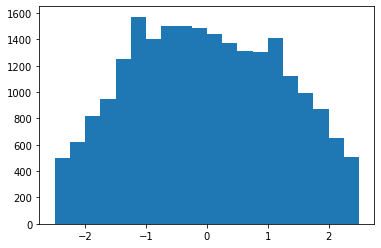

In [196]:
JetEta_1 = plt.hist(a.loc[:, 'JetEta'], bins = 20)
# JetEta is -ln(tan(theta/2)), where theta is the angle between
# the jet's momentum and the proton beam direction. Used as a spacial coordinate.

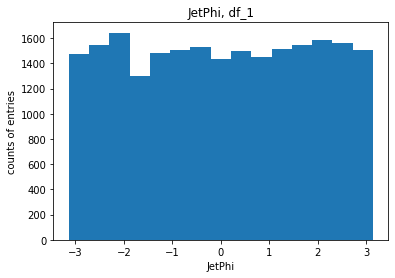

In [204]:
JetPhi_a = plt.hist(a.loc[:, 'JetPhi'], bins = 15)
plt.xlabel('JetPhi')
plt.ylabel('counts of entries')
x = plt.title('JetPhi, df_1')
# JetPhi is the azimuthal angle between the momentum and the x-axis, used as a spacial coordinate.

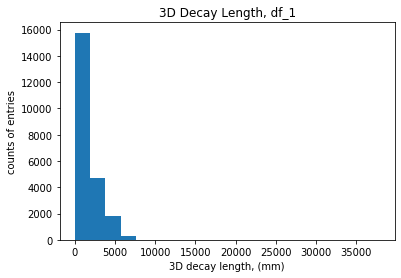

In [252]:
Lx = a.loc[:, 'Lx'].values
Ly = a.loc[:, 'Ly'].values
Lz = a.loc[:, 'Lz'].values

L = np.sqrt(Lx**2 + Ly**2 + Lz**2)
plot = plt.hist(L, bins = 20)
plt.xlabel('3D decay length, (mm)')
plt.ylabel('counts of entries')
title = plt.title('3D Decay Length, df_1')

# L is the 3-D decay length

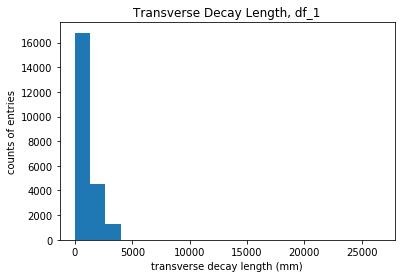

In [253]:
Lxy = np.sqrt(Lx**2 + Ly**2)
plot = plt.hist(Lxy, bins = 20)
plt.xlabel('transverse decay length (mm)')
plt.ylabel('counts of entries')
title = plt.title('Transverse Decay Length, df_1')

In [179]:
df_2 = uproot.open('df_2.root')[b'pandas_tree51358']
b = df_2.pandas.df(['JetPt', 'JetEta', 'JetPhi', 'IsLLP', 'L[xyz]'])

In [135]:
df_3 = uproot.open('df_3.root')[b'pandas_tree53278;2']
c = df_3.pandas.df(['JetPt', 'JetEta', 'JetPhi', 'IsLLP', 'L[xyz]'])

In [136]:
df_4 = uproot.open('df_4.root')[b'pandas_tree52558;2']
d = df_4.pandas.df(['JetPt', 'JetEta', 'JetPhi', 'IsLLP', 'L[xyz]'])

In [137]:
df_5 = uproot.open('df_5.root')[b'pandas_tree53038;2']
e = df_5.pandas.df(['JetPt', 'JetEta', 'JetPhi', 'IsLLP', 'L[xyz]'])

In [138]:
df_6 = uproot.open('df_6.root')[b'pandas_tree54718;7']
f = df_6.pandas.df(['JetPt', 'JetEta', 'JetPhi', 'IsLLP', 'L[xyz]'])

In [424]:
dfs = [a, b, c, d, e, f]
dfs_merged = pd.concat(dfs, keys = ['a', 'b', 'c', 'd', 'e', 'f'], names = ['File'])

In [640]:
a_a = np.full((len(a),1), 'df_1')
a_pd = pd.DataFrame(a_a, columns = ['File'])
df_new_a = [a_pd, a]
df_merge_new_a = pd.concat(df_new_a, axis = 1)

In [641]:
b_b = np.full((len(b),1), 'df_2')
b_pd = pd.DataFrame(b_b, columns = ['File'])
df_new_b = [b_pd, b]
df_merge_new_b = pd.concat(df_new_b, axis = 1)

In [642]:
c_c = np.full((len(c),1), 'df_3')
c_pd = pd.DataFrame(c_c, columns = ['File'])
df_new_c = [c_pd, c]
df_merge_new_c = pd.concat(df_new_c, axis = 1)

In [643]:
d_d = np.full((len(d),1), 'df_4')
d_pd = pd.DataFrame(d_d, columns = ['File'])
df_new_d = [d_pd, d]
df_merge_new_d = pd.concat(df_new_d, axis = 1)

In [644]:
e_e = np.full((len(e),1), 'df_5')
e_pd = pd.DataFrame(e_e, columns = ['File'])
df_new_e = [e_pd, e]
df_merge_new_e = pd.concat(df_new_e, axis = 1)

In [645]:
f_f = np.full((len(f),1), 'df_6')
f_pd = pd.DataFrame(f_f, columns = ['File'])
df_new_f = [f_pd, f]
df_merge_new_f = pd.concat(df_new_f, axis = 1)

In [647]:
finished_dfs = [df_merge_new_a, df_merge_new_b, df_merge_new_c, df_merge_new_d, df_merge_new_e, df_merge_new_f]
final_df = pd.concat(finished_dfs)

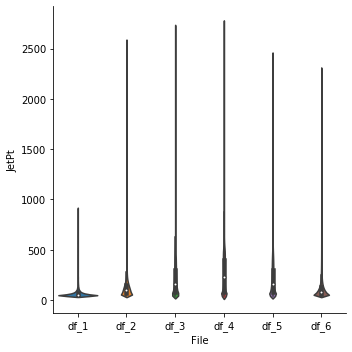

In [648]:
ax = sb.catplot(x = 'File', y = 'JetPt', data = final_df, kind = 'violin')

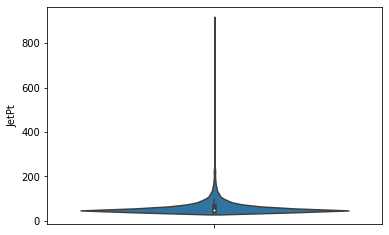

In [458]:
viol = sb.violinplot(y = dfs_merged.loc['a', 'JetPt'])